---
## Logistic regression with Sigmoid-Function

### IMPORTS 

In [13]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [9]:
class LogisticRegressionGD(object):
    '''Klassifizierer mit logistischer Regression und Gradient-Descent-Gewichtungsfindung
    
        Parameter
        --------
        eta: float
            Lernrate (zwischen 0.0 und 1.0)
        n_iter: int
            Anzahl der Durchläufe der Trainingsdatenmenge
        random_state: int
            Zufallszahlengenerator für zufällige Initialisierung der Gewichte
        
        Attributes
        ----------
        w_: 1-d array
            Gewichte nach Anpassung
        cost_: list
            Summe der quadrierten Werte der Straffunktion pro Epoche
    '''

    def __init__(self, eta:float =.05, n_iter:int =100, random_state:int =1):
        self._eta          = eta
        self._random_state = random_state
        self._n_iter       = n_iter
    
    def _net_input(self, X: np.array) -> np.array:
        '''Netzeingabe Funktion'''
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def _activation_function(self, z: np.array) -> np.array:
        '''logistische Aktivierungsfunktion berechnen'''
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, +250)))
    
    def fit(self, X:np.array, y:np.array):
        '''Fit-auf Trainingsdatenmengen
        
            Parameter
            ---------
            X: {np.array}, shape = [n_samples, n_features]
                Trainingsvektoren, n_samples ist die Anzahl der Exemplare und n_features
                ist die Anzahl der Merkmale (features)
            y: {np.array}, shape = [n_samples]
                Zielwerte
            
            Rückgabewert
            ------------
            self: object
        '''
        rgen = np.random.RandomState(self._random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1]+1)

        self.cost_ = []
        for i in range(self._n_iter):
            _net_input = self._net_input(X=X)
            output = self._activation_function(_net_input)
            errors = (y - output)
            self.w_[1:] += self._eta * X.T.dot(errors)
            self.w_[0]  += self._eta * errors.sum()
            # Berechnung des Werts der Straffunktion der logistischen Regression
            # (nicht mehr die quadratischen Fehler)
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
        return self
    
    def predict(self, X:np.array) -> np.array:
        '''Klassenbezeichnungen zurückgeben'''
        return np.where(self._net_input(X) >= 0.0, 1, 1)
        # Entspricht:  return np.where(self._activation_function(self._net_input(X) >= 0.5, 1, 0))

---
## Logistische Regressionen sind nur für binäre Klassifikationsaufgaben möglich -> DATEN LADEN
Daher nur entsprechende Teile der IRIS-Datensammlung verwenden

In [23]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
print("Shape von X: ", X.shape)
print("Feature-Names: ", iris.feature_names)
y = iris.target
print("Shape von y: ", y.shape)
print("Names zu den Klassen: ", iris.target_names)
print("Klassenbezeichnungen als Zahlen: ", np.unique(y))

Shape von X:  (150, 2)
Feature-Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape von y:  (150,)
Names zu den Klassen:  ['setosa' 'versicolor' 'virginica']
Klassenbezeichnungen als Zahlen:  [0 1 2]


In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X_train_std = sc.transform(X)
X_train_std

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

In [31]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

In [34]:
print("Shape X/y: ", X_train_01_subset.shape, " / ", y_train_01_subset.shape)
print("Dimensions X/y: ", X_train_01_subset.ndim, " / ", y_train_01_subset.ndim)

Shape X/y:  (70, 2)  /  (70,)
Dimensions X/y:  2  /  1


---
## USE MODEL ON DATA

In [35]:
lrgd = LogisticRegressionGD(eta=.05, n_iter=1000, random_state=1)
lrgd.fit(X=X_train_01_subset, y=y_train_01_subset)

In [36]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [42]:
def plot_decision_regions(X :np.array, y :np.array, classifier: LogisticRegressionGD, test_idx=None, resolution=.01):
    # Markierungen und Farben
    markers = ('s', 'x', 'o', 'v', '^')
    colors  = ("red", "green", "blue", "lightgreen", "cyan")
    cmap    = ListedColormap(colors[:len(np.unique(y))])

    # Plotten Entscheidungsgrenze
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Exemplare
    for idx, cl in enumerate(np.unique(y)):
        print("Index: ", idx)
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='hotpink')
    
    # Exemplare der Testdatenmenge hervorheben -> wir kreisen diese Punkte explizit ein
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0], 
                    X_test[:,1],
                    c='',
                    edgecolors='hotpink',
                    alpha=1.0,
                    linewidths=1, 
                    marker='o',
                    s=100,
                    label='Testdaten')

Index:  0
Index:  1


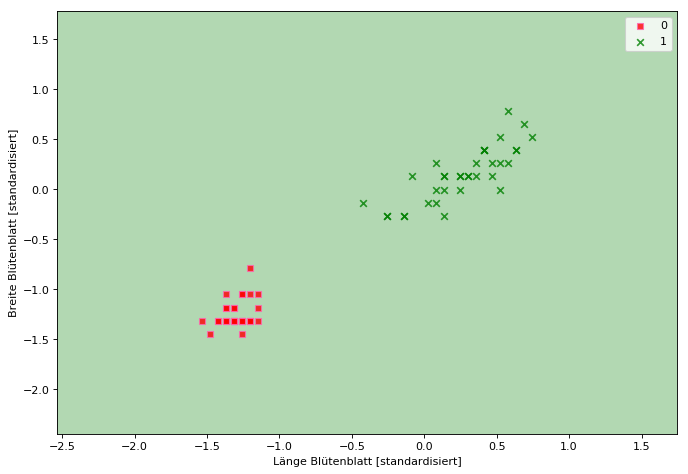

In [40]:
figure(figsize=(10,7), dpi=80)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel("Länge Blütenblatt [standardisiert]")
plt.ylabel("Breite Blütenblatt [standardisiert]")
plt.legend(loc="best")
plt.show()